<a href="https://colab.research.google.com/github/victorjoseij/Machine_learning/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['CustomerId', 'RowNumber', 'Surname'],axis=1,inplace=True) #has been put here after testing below

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
d = df['Geography'].value_counts()
d

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

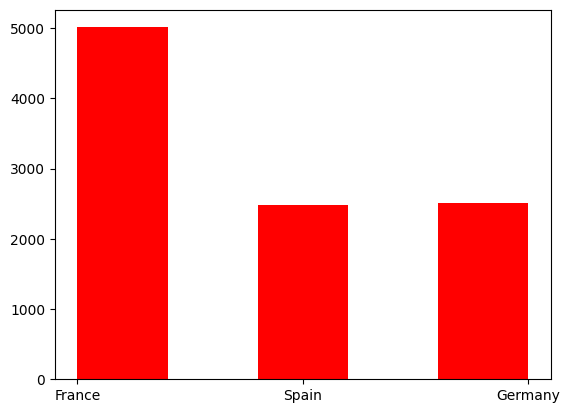

In [ ]:
pt.hist(df['Geography'], bins=5, color='red');

In [ ]:
df_other = df[df['Geography']!='France']
len(df_other)

4986

In [ ]:
df_france = df[df['Geography']=='France']
len(df_france)

5014

In [ ]:
df_france = resample(df_france, replace=False,
                     n_samples=int(np.mean([len(df[df['Geography']=='Germany']),len(df[df['Geography']=='Spain'])])))
len(df_france)

2493

In [ ]:
#The data has been resampled.

In [ ]:
g = df['HasCrCard'].value_counts()
g

1    5249
0    2230
Name: HasCrCard, dtype: int64

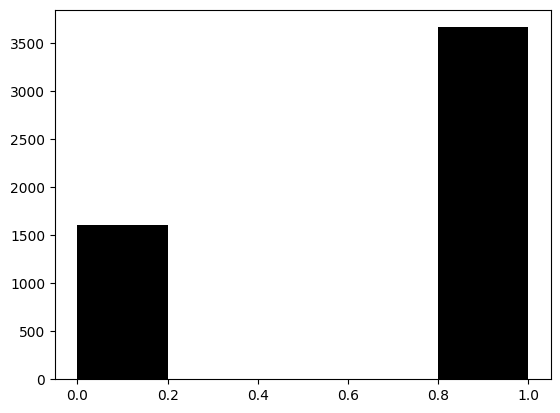

In [ ]:
pt.hist(df['HasCrCard'], bins=5, color='black');

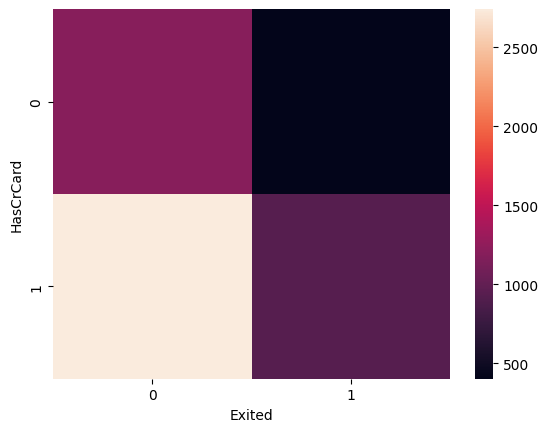

In [ ]:
sb.heatmap(pd.crosstab(df['HasCrCard'], df['Exited']));

In [ ]:
h = df['IsActiveMember'].value_counts()
h

1    3881
0    3598
Name: IsActiveMember, dtype: int64

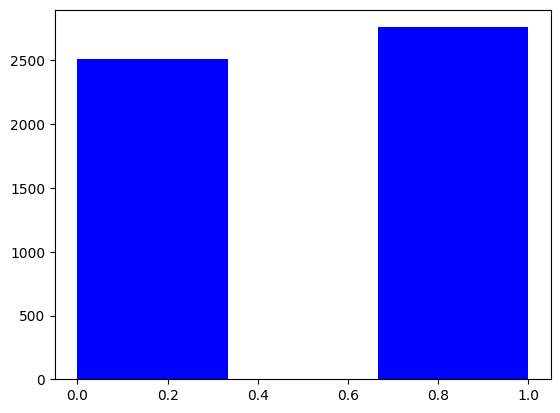

In [ ]:
pt.hist(df['IsActiveMember'], bins=3, color='blue');

In [ ]:
#IsActiveMember is normalized.

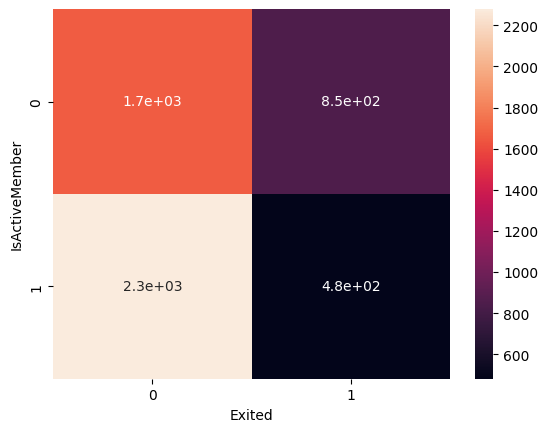

In [ ]:
sb.heatmap(pd.crosstab(df['IsActiveMember'], df['Exited']), annot=True);

In [ ]:
pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited'])

Exited                        0    1
Geography Gender HasCrCard          
France    Female 0          278   68
                 1          601  159
          Male   0          355   55
                 1          848  129
Germany   Female 0          219  131
                 1          526  317
          Male   0          262  106
                 1          688  260
Spain     Female 0          244   74
                 1          614  157
          Male   0          377   61
                 1          829  121

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


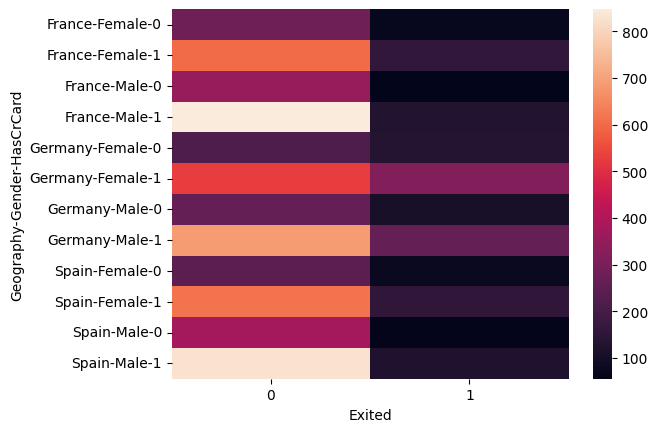

In [ ]:
sb.heatmap(pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited']));

In [ ]:
df['Tenure'].value_counts()

8     782
2     781
5     781
3     779
1     760
7     756
9     737
4     728
6     707
10    360
0     308
Name: Tenure, dtype: int64

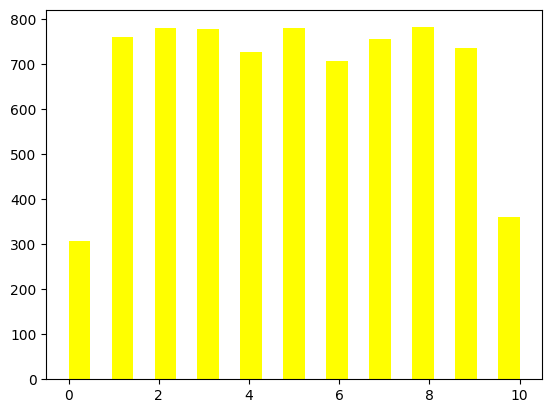

In [ ]:
pt.hist(df['Tenure'],bins=21,color='yellow');

In [ ]:
df_ten = df[(df['Tenure']==0) | (df['Tenure']==10)]
df_others = df[(df['Tenure']!=0) | (df['Tenure']!=10)]

In [ ]:
df_ten['Tenure'].value_counts()

10    360
0     308
Name: Tenure, dtype: int64

In [ ]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [ ]:
df = pd.concat([df_ten, df_others])

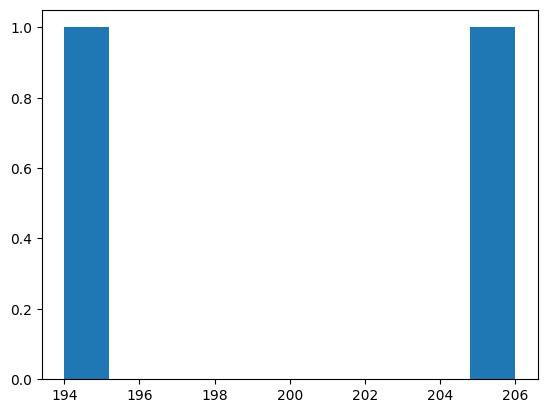

In [ ]:
pt.hist(df_ten['Tenure'].value_counts());

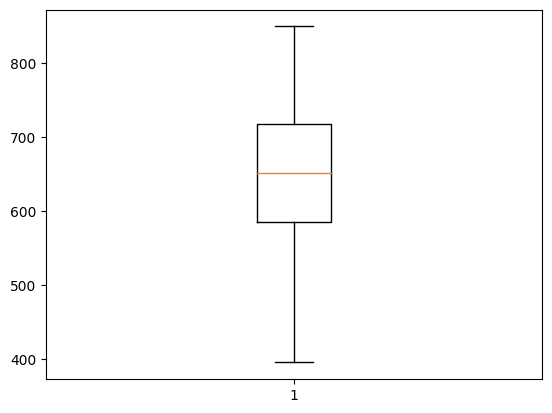

In [ ]:
pt.boxplot(df['CreditScore']); #outliers are seen to the left of the 400 mark.

In [ ]:
df = df[df['CreditScore']>=390]

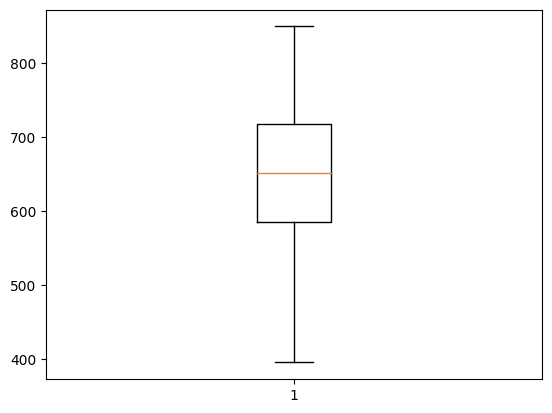

In [ ]:
pt.boxplot(df['CreditScore']);

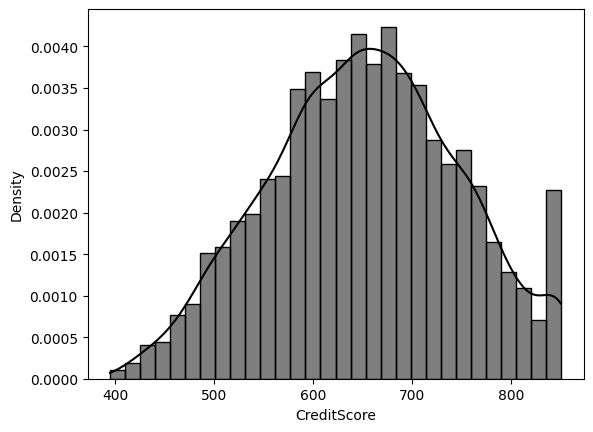

In [ ]:
sb.histplot(df['CreditScore'], kde=True, color='black', stat='density');
# sb.kdeplot(df['CreditScore'], color='red');

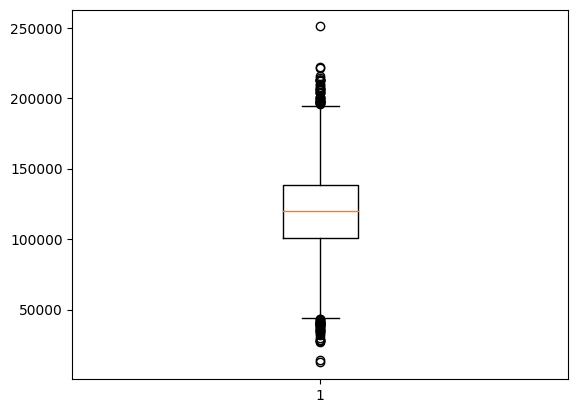

In [ ]:
pt.boxplot(df['Balance']); #shows negative skewness

In [ ]:
df['Balance'].skew()

-0.27344897222630693

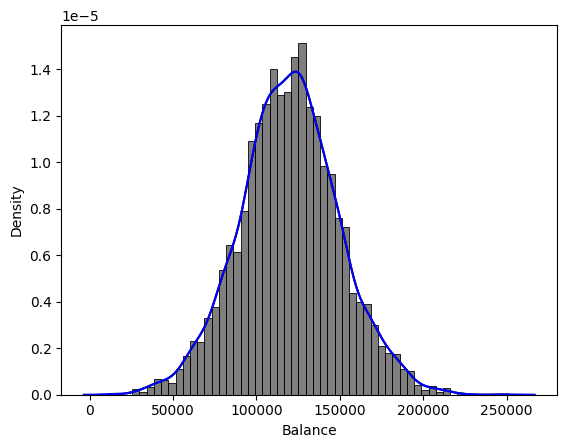

In [ ]:
sb.histplot(df['Balance'], kde=True, color='black', stat='density', fill=True)
sb.kdeplot(df['Balance'], color='blue');

In [ ]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])

32.48 % of the data has 0 Balance.

In [ ]:
df = df[df['Balance']!=0]

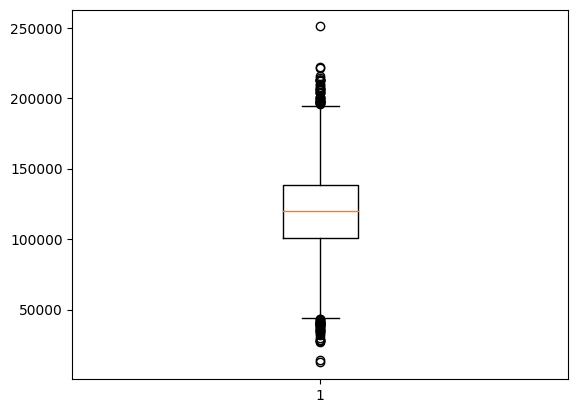

In [ ]:
pt.boxplot(df['Balance']);

<Axes: xlabel='Balance', ylabel='Density'>

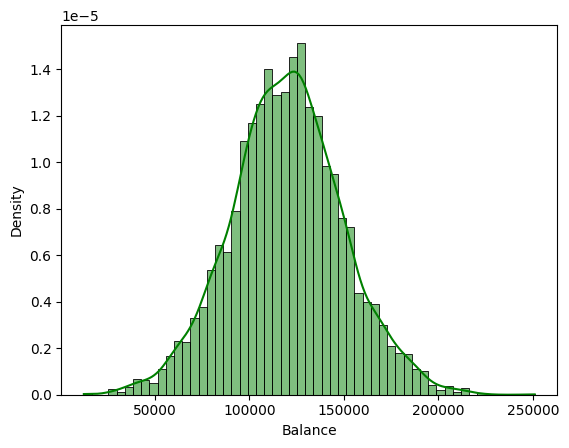

In [ ]:
sb.histplot(df['Balance'], kde=True, color='green', stat='density')
# sb.kdeplot(df['Balance'], color='brown');

In [ ]:
geography_counts = data.groupby('Geography').size().tolist()
plt.hist(geography_counts, bins=len(geography_counts), align='left', color='blue', edgecolor='black')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Geography Counts')
plt.xticks(range(len(geography_counts)), data['Geography'].unique(), rotation=45) # Set x-axis labels
plt.tight_layout() # Ensures labels and titles are visible
plt.show()
[08/08, 10:58 pm] Swastik Christ Aiml: # Replace these values with your actual data
geography_counts = [500, 300, 200] # Example counts for France, Germany, Spain
geography_labels = ['France', 'Germany', 'Spain']

plt.bar(geography_labels, geography_counts, color=['blue', 'green', 'red'])
plt.xlabel('Geography')
plt.ylabel('Counts')
plt.title('Counts of Geography')
plt.show()

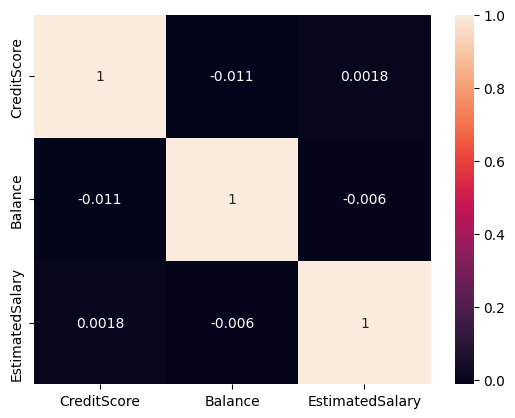

In [ ]:
corr_mat = df[['CreditScore','Balance','EstimatedSalary']]
corr_mat = corr.corr()
sb.heatmap(corr, annot=True);

In [ ]:
df['NumOfProducts'].value_counts()

1    3369
2    1759
3     146
4      35
Name: NumOfProducts, dtype: int64

In [ ]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,2410,959
2,1525,234
3,10,136
4,0,35


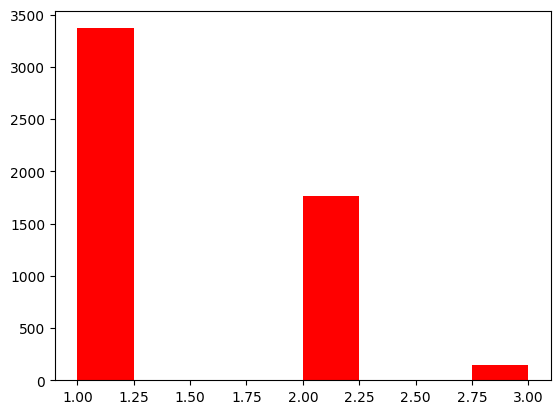

In [ ]:
pt.hist(df['NumOfProducts'], bins=8, color='red');

In [ ]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [ ]:
df['NumOfProducts'].value_counts()

1    3369
2    1759
3     146
Name: NumOfProducts, dtype: int64

In [ ]:
#split data into two sets
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [ ]:
y.shape

(5274,)

In [ ]:
df_corr = df.corr(numeric_only=True)
df_corr

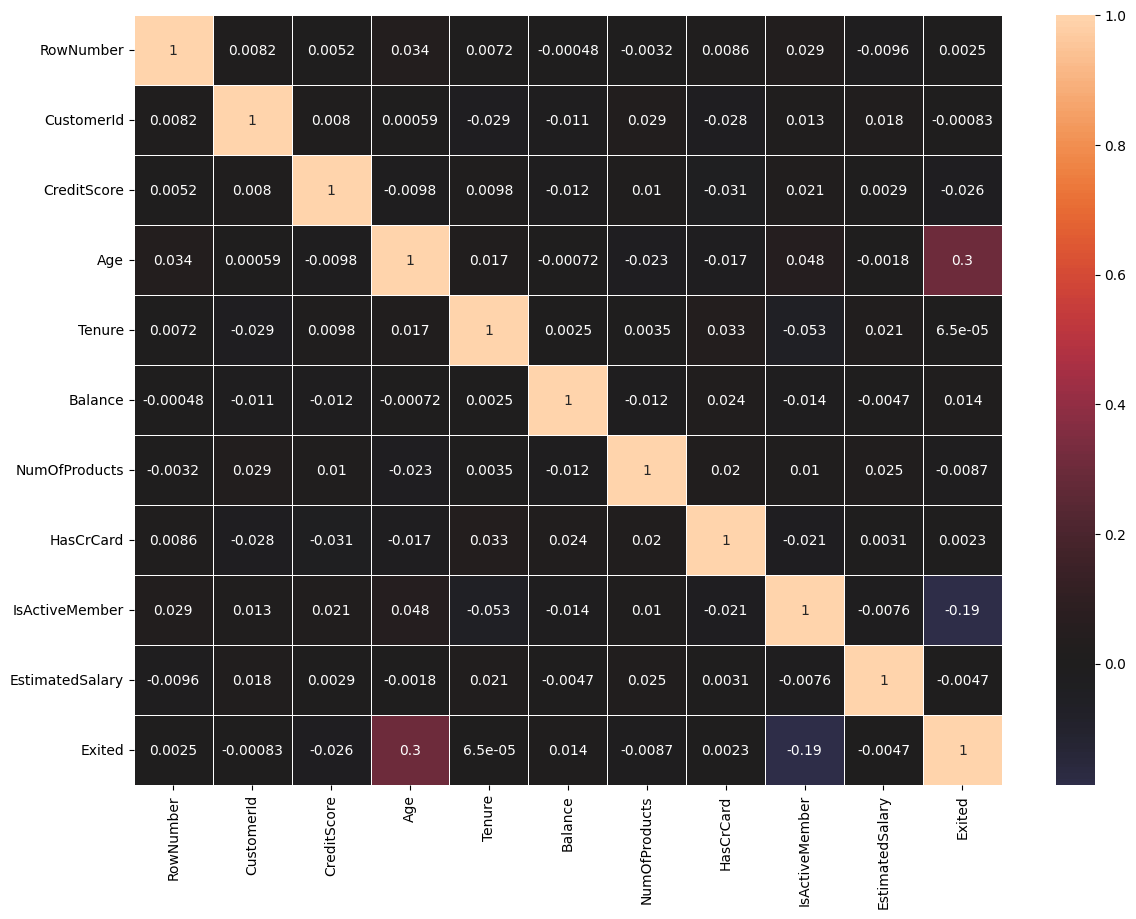

In [ ]:
fig,ax = pt.subplots(figsize=(14,10))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0)
pt.show()

In [ ]:
scale = scaler()
x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

In [ ]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
5798,5799,15797627,Niehaus,732,Spain,Male,54,0,134249.70,1
5408,5409,15638257,P'an,682,Spain,Female,54,0,83102.72,2
164,165,15658929,Taverner,683,Spain,Male,29,0,133702.89,1
6817,6818,15593128,Vinogradoff,608,France,Female,56,10,129255.20,2
470,471,15759298,Shih,631,Spain,Male,27,10,134169.62,1
...,...,...,...,...,...,...,...,...,...,...
5597,5598,15815552,Ferguson,670,France,Female,42,6,112333.63,1
2925,2926,15633531,Lavrov,717,France,Female,76,9,138489.66,1
9925,9926,15605672,Yuan,694,France,Female,38,5,195926.39,1
8462,8463,15778481,Chigbogu,817,France,Male,59,1,118962.58,1


In [ ]:
x = pd.get_dummies(x, columns=['Geography', 'Gender', 'Surname'])
x

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5798,5799,15797627,Niehaus,732,54,0,134249.70,1,0,0,1,0,1
5408,5409,15638257,P'an,682,54,0,83102.72,2,0,0,1,1,0
164,165,15658929,Taverner,683,29,0,133702.89,1,0,0,1,0,1
6817,6818,15593128,Vinogradoff,608,56,10,129255.20,2,1,0,0,1,0
470,471,15759298,Shih,631,27,10,134169.62,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,5598,15815552,Ferguson,670,42,6,112333.63,1,1,0,0,1,0
2925,2926,15633531,Lavrov,717,76,9,138489.66,1,1,0,0,1,0
9925,9926,15605672,Yuan,694,38,5,195926.39,1,1,0,0,1,0
8462,8463,15778481,Chigbogu,817,59,1,118962.58,1,1,0,0,0,1
